In [115]:
import pandas as pd
import os
from nltk.tokenize import word_tokenize
from num2words import num2words
import nltk
import string
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pickle
import math
import numpy as np
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize
import operator
from sklearn.model_selection import train_test_split
import random
from tqdm import tqdm
import copy
from sklearn.metrics import confusion_matrix

In [116]:
folder_name ='Assignment3_IR/20_newsgroups/'
folders = ['comp.graphics','sci.med','talk.politics.misc','rec.sport.hockey','sci.space']

In [117]:
#uploading of data in this block and appending files and class_names to X and Y.
files_path=[]
total_doc = 0
labels =[]
X=[]
Y=[]
f=[]
for folder in folders:
    for files in (os.listdir(folder_name+'/'+folder)):
        i=str(folder_name+'/'+folder+'/'+files)
        total_doc+=1
        files_path.append(i)
        labels.append(folder)
        X.append((files))
        f.append(files)
        Y.append(folder)

In [118]:
#as the name suggest here data is splitted into train and test data, user need to enter train split ratio in fraction.

def train_test_split(X,Y,split_ratio):
    length_X =len(X)
    #length_Y = len(Y)
    #length_Y = len(folders)
    files_class = int(length_X/len(folders))
    frac = int((length_X/len(folders))*(split_ratio))
    train_X =[] 
    train_Y=[]
    test_X =[]
    test_Y=[]
    #list1=list2=list3=list4=list5=[]
    ctr = 0
    #l = list(range(len(X)))
    #random.shuffle(l)
    for i in range(1,(len(folders)+1)):
        l = list(range(0+ctr,files_class+ctr))
        random.shuffle(l)
        c = 0+ctr
        for j in l:
            if c < frac + ctr:
                train_X.append(X[j])
                train_Y.append(Y[j])
            else:
                test_X.append(X[j])
                test_Y.append(Y[j])
            c+=1
            #print(c)
        ctr = files_class * i
    return train_X,test_X,train_Y,test_Y

In [119]:
#function calling 
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,0.7)

In [120]:
#function used for data preprocessing includes removal of stopwords,punctuations and words of length 1.
#words are converted into lowercase and num2words.
def preprocess_data(text):
    token_list=[]
    ps = nltk.PorterStemmer() 
    stop_words = set(stopwords.words('english'))
    #text = removeHeader(text)
    text = text.lower()
    text = word_tokenize(text)
    punc = string.punctuation
    tokens = [i for i in text if not i in (stop_words and punc)]
    for word in tokens:
        w=word.translate(str.maketrans('','',string.punctuation))
        if len(w)>1 and w!= '' and w not in stop_words:
            w=ps.stem(w)
            if w.isnumeric():
                w = num2words(w)
                token_list.append(w)
            else:
                token_list.append(w)
    return token_list

In [121]:
#dictionary is generated
train_X_dic = {}
class_terms={}
for i in tqdm(range(len(train_X))):
    if train_Y[i] not in train_X_dic:
        train_X_dic[train_Y[i]]={} #if class_label not present add it
    if train_Y[i] not in class_terms:
        class_terms[train_Y[i]]={} #same as above
    #reading train data
    with open(folder_name+'/'+train_Y[i]+'/'+train_X[i],'r',encoding='cp1250',errors='ignore') as file:
        prc_data=preprocess_data(file.read()) #preprocessing
        
        class_terms[train_Y[i]][train_X[i]]={}  # document not present then add that doc id.
        
        for j in range(len(prc_data)):
            if prc_data[j] not in class_terms[train_Y[i]][train_X[i]]:
                class_terms[train_Y[i]][train_X[i]][prc_data[j]]=1 #if word not present add it into a dictionary with value as 1
            if prc_data[j] not in train_X_dic[train_Y[i]]:
                train_X_dic[train_Y[i]][prc_data[j]]=1 #term frequency of term in a class.
            else:
                train_X_dic[train_Y[i]][prc_data[j]]+=1




  0%|          | 0/3500 [00:00<?, ?it/s]


  0%|          | 6/3500 [00:00<01:18, 44.50it/s]


  0%|          | 10/3500 [00:00<01:25, 40.59it/s]


  0%|          | 13/3500 [00:00<01:39, 35.01it/s]


  1%|          | 21/3500 [00:00<01:23, 41.48it/s]


  1%|          | 27/3500 [00:00<01:17, 44.66it/s]


  1%|          | 35/3500 [00:00<01:08, 50.36it/s]


  1%|          | 42/3500 [00:00<01:04, 53.93it/s]


  1%|▏         | 48/3500 [00:00<01:13, 47.02it/s]


  2%|▏         | 54/3500 [00:01<01:08, 50.19it/s]


  2%|▏         | 60/3500 [00:01<02:57, 19.41it/s]


  2%|▏         | 64/3500 [00:01<02:30, 22.77it/s]


  2%|▏         | 68/3500 [00:02<02:17, 24.98it/s]


  2%|▏         | 73/3500 [00:02<01:57, 29.19it/s]


  2%|▏         | 78/3500 [00:02<01:44, 32.66it/s]


  2%|▏         | 87/3500 [00:02<01:25, 39.95it/s]


  3%|▎         | 93/3500 [00:02<01:35, 35.58it/s]


  3%|▎         | 98/3500 [00:02<01:32, 36.69it/s]


  3%|▎         | 104/3500 [00:02<01:22, 40.92it/s]


  3%|▎         | 1

 46%|████▌     | 1599/3500 [00:37<00:48, 39.44it/s]


 46%|████▌     | 1604/3500 [00:37<00:47, 39.66it/s]


 46%|████▌     | 1609/3500 [00:37<00:46, 40.87it/s]


 46%|████▌     | 1614/3500 [00:38<00:46, 40.29it/s]


 46%|████▋     | 1619/3500 [00:38<00:45, 41.46it/s]


 46%|████▋     | 1625/3500 [00:38<00:42, 44.50it/s]


 47%|████▋     | 1630/3500 [00:38<00:41, 45.24it/s]


 47%|████▋     | 1636/3500 [00:38<00:51, 36.02it/s]


 47%|████▋     | 1640/3500 [00:38<00:58, 31.65it/s]


 47%|████▋     | 1644/3500 [00:38<01:10, 26.29it/s]


 47%|████▋     | 1648/3500 [00:39<01:11, 25.91it/s]


 47%|████▋     | 1654/3500 [00:39<01:00, 30.66it/s]


 47%|████▋     | 1659/3500 [00:39<01:06, 27.69it/s]


 48%|████▊     | 1664/3500 [00:39<00:58, 31.62it/s]


 48%|████▊     | 1669/3500 [00:39<00:51, 35.50it/s]


 48%|████▊     | 1674/3500 [00:39<00:52, 34.71it/s]


 48%|████▊     | 1678/3500 [00:39<00:57, 31.46it/s]


 48%|████▊     | 1682/3500 [00:40<00:58, 31.29it/s]


 48%|████▊     | 1687/3500 [

 82%|████████▏ | 2857/3500 [01:22<00:20, 31.68it/s]


 82%|████████▏ | 2861/3500 [01:22<00:21, 29.34it/s]


 82%|████████▏ | 2865/3500 [01:22<00:20, 31.45it/s]


 82%|████████▏ | 2872/3500 [01:23<00:17, 36.83it/s]


 82%|████████▏ | 2877/3500 [01:23<00:15, 39.17it/s]


 82%|████████▏ | 2882/3500 [01:23<00:15, 38.64it/s]


 82%|████████▏ | 2887/3500 [01:23<00:29, 20.45it/s]


 83%|████████▎ | 2893/3500 [01:23<00:24, 24.84it/s]


 83%|████████▎ | 2898/3500 [01:24<00:20, 28.91it/s]


 83%|████████▎ | 2904/3500 [01:24<00:17, 34.12it/s]


 83%|████████▎ | 2910/3500 [01:24<00:15, 38.58it/s]


 83%|████████▎ | 2917/3500 [01:24<00:13, 44.27it/s]


 84%|████████▎ | 2923/3500 [01:24<00:12, 46.04it/s]


 84%|████████▎ | 2929/3500 [01:24<00:11, 48.63it/s]


 84%|████████▍ | 2935/3500 [01:24<00:12, 46.26it/s]


 84%|████████▍ | 2941/3500 [01:24<00:11, 48.57it/s]


 84%|████████▍ | 2947/3500 [01:24<00:10, 50.89it/s]


 84%|████████▍ | 2953/3500 [01:25<00:10, 50.79it/s]


 85%|████████▍ | 2959/3500 [

In [122]:
#total distinct words in an entire corpus
vocab=[]
for classes in train_X_dic:
    for terms in train_X_dic[classes]:
        vocab.append(terms)
vocab = set(vocab)
print(len(vocab))

56525


In [123]:
#dictionary for containg N11 N10 N01 and N00 for a term 
MI={}
class_doc_count=0
for classes in class_terms:
    #print(len(train_X_dic[l]))
    class_doc_count+=len(class_terms[classes]) #total number of documents i.e N
for classes in train_X_dic:
    MI[classes]={}
    for term in train_X_dic[classes]:
        MI[classes][term]= {'N11':0, 'N01':0, 'N10':0, 'N00':0} #for every term in train data adding 4 parameters
        docs_count=0 #setting doc count as 0.
        for doc in class_terms[classes]:
            if term in class_terms[classes][doc]:
                docs_count+=1
            MI[classes][term]['N11']=docs_count #documents for N11 i.e terms that are present in document
            n11 = MI[classes][term]['N11']
            MI[classes][term]['N01']=len(class_terms[classes])-docs_count #number of documents in N01,terms that are not present in a that particular class
            n01 = MI[classes][term]['N01']
    for classes in MI:
        for term in MI[classes]:
            docs=0
            for l in MI:
                #print(l)
                if l == classes or term not in MI[l]: #checking the condition for N10 and N00 
                    continue
                docs+=MI[l][term]['N11']
            MI[classes][term]['N10']=docs
            n10 = MI[classes][term]['N10']  
            #N00 is total documents minus sum of all parameters i.e N11,N10 and N01 
            MI[classes][term]['N00']=class_doc_count-MI[classes][term]['N10']-MI[classes][term]['N11']-MI[classes][term]['N01']

In [124]:
#dictionary for storing MI value of a term.
I={}
for classes in MI:
    I[classes]={}
    for term in MI[classes]: #getting all values of term 
        N11 = MI[classes][term]['N11']
        N00 = MI[classes][term]['N00']
        N10 = MI[classes][term]['N10']
        N01 = MI[classes][term]['N01']
        
        N_dot1 = N11 + N01 #applying MI formula 
        N_dot0 = N10 + N00
        
        N1_dot = N11 + N10
        N0_dot = N01 + N00
        
        N = N11 + N00 + N10 + N01
        
        if N11 == 0: #if any of the parameter is 0 set value as 0.
            val1=0
        else:
            val1 = (N11/N)*math.log((N*N11)/(N1_dot*N_dot1),2)
        if N01 == 0:
            val2=0
        else:
            val2 = (N01/N)*math.log((N*N01)/(N0_dot*N_dot1),2)
        if N10==0:
            val3=0
        else:
            val3 = (N10/N)*math.log((N*N10)/(N1_dot*N_dot0),2)
        if N00==0:
            val4=0
        else:
            val4 = (N00/N)*math.log((N*N00)/(N0_dot*N_dot0),2)
        
        #variable storing I(U,C) value of term
        total = val1+val2+val3+val4
        I[classes][term]=total #Assigning value to each term in that particular class

In [126]:
print(len(I['sci.space']))

16179


In [127]:
#making I of a vocab size
for classes in I:
    for term in vocab:
        if term not in I[classes]:
            I[classes][term]=0

In [131]:
print(len(I['sci.med']))

56525


In [164]:
#sorting I and choose desired number of features by entering the percentage of k in fraction
train_X_dic={}
for key in I:
    train_X_dic[key] = sorted(I[key].items(), key = lambda x: x[1],reverse=True)
    train_X_dic[key] = dict(train_X_dic[key][:(int)((0.4)*len(train_X_dic[key]))])  #selecting some percentage among all values of I

In [165]:
print(len(train_X_dic['sci.space']))

22610


In [166]:
#used for generating document vector of voacb size of all documents in a particular class.
doc_vector={}
for i in tqdm(range(len(train_X))):
    if train_Y[i] not in doc_vector:
        doc_vector[train_Y[i]]={}  #class label not present add it 
    if train_X[i] not in doc_vector[train_Y[i]]:
        doc_vector[train_Y[i]][train_X[i]]=[]  #adding documents of a particular class
        for term in train_X_dic[train_Y[i]]:
            if term in class_terms[train_Y[i]][train_X[i]]:
                doc_vector[train_Y[i]][train_X[i]].append(I[train_Y[i]][term]) #term present in doc add I else 0
            else:
                doc_vector[train_Y[i]][train_X[i]].append(0)
        doc_vector[train_Y[i]][train_X[i]] = np.asarray(doc_vector[train_Y[i]][train_X[i]]) #convert it to array for faster computations




  0%|          | 0/3500 [00:00<?, ?it/s]


  0%|          | 5/3500 [00:00<01:11, 49.12it/s]


  0%|          | 11/3500 [00:00<01:08, 50.93it/s]


  0%|          | 17/3500 [00:00<01:07, 51.61it/s]


  1%|          | 22/3500 [00:00<01:09, 49.69it/s]


  1%|          | 27/3500 [00:00<01:10, 49.30it/s]


  1%|          | 33/3500 [00:00<01:08, 50.40it/s]


  1%|          | 38/3500 [00:00<01:09, 49.91it/s]


  1%|▏         | 44/3500 [00:00<01:06, 51.61it/s]


  1%|▏         | 49/3500 [00:00<01:08, 50.27it/s]


  2%|▏         | 54/3500 [00:01<01:10, 49.03it/s]


  2%|▏         | 59/3500 [00:01<01:10, 48.67it/s]


  2%|▏         | 64/3500 [00:01<01:12, 47.54it/s]


  2%|▏         | 69/3500 [00:01<01:11, 47.77it/s]


  2%|▏         | 74/3500 [00:01<01:14, 46.13it/s]


  2%|▏         | 80/3500 [00:01<01:11, 47.90it/s]


  2%|▏         | 85/3500 [00:01<01:13, 46.63it/s]


  3%|▎         | 91/3500 [00:01<01:10, 48.49it/s]


  3%|▎         | 96/3500 [00:01<01:13, 46.19it/s]


  3%|▎         | 10

 40%|████      | 1408/3500 [00:30<00:57, 36.35it/s]


 40%|████      | 1412/3500 [00:30<01:01, 34.21it/s]


 40%|████      | 1416/3500 [00:30<01:03, 32.77it/s]


 41%|████      | 1421/3500 [00:30<00:57, 36.10it/s]


 41%|████      | 1426/3500 [00:30<00:54, 38.33it/s]


 41%|████      | 1430/3500 [00:30<00:59, 34.96it/s]


 41%|████      | 1435/3500 [00:30<00:54, 37.90it/s]


 41%|████      | 1440/3500 [00:31<00:52, 39.38it/s]


 41%|████▏     | 1445/3500 [00:31<00:57, 36.04it/s]


 41%|████▏     | 1450/3500 [00:31<00:52, 39.13it/s]


 42%|████▏     | 1455/3500 [00:31<00:52, 38.82it/s]


 42%|████▏     | 1460/3500 [00:31<00:50, 40.48it/s]


 42%|████▏     | 1465/3500 [00:31<00:49, 41.50it/s]


 42%|████▏     | 1470/3500 [00:31<00:46, 43.44it/s]


 42%|████▏     | 1475/3500 [00:31<00:47, 42.76it/s]


 42%|████▏     | 1480/3500 [00:32<00:46, 43.72it/s]


 42%|████▏     | 1485/3500 [00:32<00:47, 42.36it/s]


 43%|████▎     | 1490/3500 [00:32<00:49, 40.67it/s]


 43%|████▎     | 1495/3500 [

 81%|████████  | 2824/3500 [01:00<00:17, 39.62it/s]


 81%|████████  | 2829/3500 [01:00<00:18, 36.63it/s]


 81%|████████  | 2834/3500 [01:00<00:16, 39.44it/s]


 81%|████████  | 2839/3500 [01:00<00:16, 40.08it/s]


 81%|████████▏ | 2844/3500 [01:01<00:19, 33.32it/s]


 81%|████████▏ | 2850/3500 [01:01<00:17, 37.78it/s]


 82%|████████▏ | 2855/3500 [01:01<00:17, 36.96it/s]


 82%|████████▏ | 2859/3500 [01:01<00:18, 34.67it/s]


 82%|████████▏ | 2864/3500 [01:01<00:17, 37.06it/s]


 82%|████████▏ | 2869/3500 [01:01<00:15, 39.89it/s]


 82%|████████▏ | 2874/3500 [01:01<00:16, 37.34it/s]


 82%|████████▏ | 2878/3500 [01:02<00:16, 36.69it/s]


 82%|████████▏ | 2884/3500 [01:02<00:15, 40.33it/s]


 83%|████████▎ | 2889/3500 [01:02<00:15, 40.21it/s]


 83%|████████▎ | 2894/3500 [01:02<00:16, 37.21it/s]


 83%|████████▎ | 2900/3500 [01:02<00:14, 40.88it/s]


 83%|████████▎ | 2906/3500 [01:02<00:13, 42.81it/s]


 83%|████████▎ | 2911/3500 [01:02<00:15, 37.83it/s]


 83%|████████▎ | 2916/3500 [

In [174]:
#dictionary for mapping every document with it's class label.
mapping_doc={}
#print(doc_vector)
for i in range(len(X)):
    mapping_doc[X[i]]=Y[i]

In [175]:
def compute_distance(test_doc,classes): #cosine similarity formula is used taking train document vector and test document vector as input
    distance = {}                                         
    for doc in doc_vector[classes]:
        temp = np.dot(doc_vector[classes][doc], test_doc)   
        temp = np.dot(temp, temp)
        numer = math.sqrt(np.sum(temp))
        d1 = np.sqrt(np.sum(np.dot(test_doc,test_doc)))
        d2 = np.sqrt(np.sum(np.dot(doc_vector[classes][doc], doc_vector[classes][doc])))
        try:
            distance[doc] = numer/(d1*d2) #storing result into a dictionary if not 0 
        except:
            distance[doc] = 0
    #print(distance)
    return distance

In [176]:
predicted_1=[]
predicted_3=[]
predicted_5=[]
label = []
for i in tqdm(range(len(test_X))):
     with open(folder_name+'/'+test_Y[i]+'/'+test_X[i],'r',encoding='cp1250',errors='ignore') as f:
        data = preprocess_data(f.read())
        vector=[]
        dist_class={}
        for classes in folders:
            class_vector = []
            for term in train_X_dic[classes]:
                #print(classes,term)
                if term not in data:
                    class_vector.append(0)
                else:
                    class_vector.append(I[classes][term])
            class_vector = np.asarray(class_vector)
            distance = compute_distance(class_vector, classes)
            dist_class.update(distance)
#        l = sorted(dist_class.items(),key=lambda x:x[1], reverse = True)
#        label.append(mapping_doc[l[0][0]])
#        print(mapping_doc[l[0][0]], l[0][0])
#        print(mapping_doc[l[1][0]], l[1][0])
        min_1 = max(dist_class, key = dist_class.get)
        min1 = min_1,dist_class[min_1]
        #print(min1)
        del dist_class[min_1]
        min_2 = max(dist_class, key = dist_class.get)
        min2 = min_2,dist_class[min_2]
        #print(min2)
        del dist_class[min_2]
        min_3 = max(dist_class, key = dist_class.get)
        min3 = min_3,dist_class[min_3]
        #print(min3)
        del dist_class[min_3]
        min_4 = max(dist_class, key = dist_class.get)
        min4 = min_4,dist_class[min_4]
        #print(min4)
        del dist_class[min_4]
        min_5 = max(dist_class, key = dist_class.get)
        min5 = min_5,dist_class[min_5]
        #print(min5)
        del dist_class[min_5]
        labels = {'comp.graphics':0, 'sci.med':0, 'talk.politics.misc':0, 'rec.sport.hockey':0, 'sci.space':0}
        
        labels[mapping_doc[min_1]]+=1
        predicted_1.append(max(labels, key = labels.get))
        labels[mapping_doc[min_2]]+=1
        labels[mapping_doc[min_3]]+=1
        predicted_3.append(max(labels, key = labels.get))
        labels[mapping_doc[min_4]]+=1
        labels[mapping_doc[min_5]]+=1
        predicted_5.append(max(labels, key = labels.get))




  0%|          | 0/1500 [00:00<?, ?it/s]


  0%|          | 1/1500 [00:00<13:54,  1.80it/s]


  0%|          | 2/1500 [00:01<14:20,  1.74it/s]


  0%|          | 3/1500 [00:01<15:34,  1.60it/s]


  0%|          | 4/1500 [00:03<24:35,  1.01it/s]


  0%|          | 5/1500 [00:04<22:55,  1.09it/s]


  0%|          | 6/1500 [00:05<20:58,  1.19it/s]


  0%|          | 7/1500 [00:05<18:36,  1.34it/s]


  1%|          | 8/1500 [00:06<19:22,  1.28it/s]


  1%|          | 9/1500 [00:07<19:08,  1.30it/s]


  1%|          | 10/1500 [00:08<20:07,  1.23it/s]


  1%|          | 11/1500 [00:09<21:02,  1.18it/s]


  1%|          | 12/1500 [00:09<19:11,  1.29it/s]


  1%|          | 13/1500 [00:10<17:22,  1.43it/s]


  1%|          | 14/1500 [00:12<27:53,  1.13s/it]


  1%|          | 15/1500 [00:13<26:44,  1.08s/it]


  1%|          | 16/1500 [00:14<24:36,  1.01it/s]


  1%|          | 17/1500 [00:15<23:34,  1.05it/s]


  1%|          | 18/1500 [00:15<20:35,  1.20it/s]


  1%|▏         | 19/1500 [0

 18%|█▊        | 264/1500 [04:17<22:08,  1.07s/it]


 18%|█▊        | 265/1500 [04:18<20:37,  1.00s/it]


 18%|█▊        | 266/1500 [04:19<22:13,  1.08s/it]


 18%|█▊        | 267/1500 [04:20<20:43,  1.01s/it]


 18%|█▊        | 268/1500 [04:21<21:09,  1.03s/it]


 18%|█▊        | 269/1500 [04:22<19:42,  1.04it/s]


 18%|█▊        | 270/1500 [04:23<19:12,  1.07it/s]


 18%|█▊        | 271/1500 [04:25<26:20,  1.29s/it]


 18%|█▊        | 272/1500 [04:26<23:24,  1.14s/it]


 18%|█▊        | 273/1500 [04:27<25:00,  1.22s/it]


 18%|█▊        | 274/1500 [04:28<22:01,  1.08s/it]


 18%|█▊        | 275/1500 [04:29<21:24,  1.05s/it]


 18%|█▊        | 276/1500 [04:30<20:41,  1.01s/it]


 18%|█▊        | 277/1500 [04:31<20:09,  1.01it/s]


 19%|█▊        | 278/1500 [04:32<20:49,  1.02s/it]


 19%|█▊        | 279/1500 [04:33<22:11,  1.09s/it]


 19%|█▊        | 280/1500 [04:34<20:57,  1.03s/it]


 19%|█▊        | 281/1500 [04:35<22:47,  1.12s/it]


 19%|█▉        | 282/1500 [04:36<20:47,  1.02s

 35%|███▌      | 528/1500 [08:23<10:33,  1.53it/s]


 35%|███▌      | 529/1500 [08:24<10:38,  1.52it/s]


 35%|███▌      | 530/1500 [08:24<09:54,  1.63it/s]


 35%|███▌      | 531/1500 [08:25<09:37,  1.68it/s]


 35%|███▌      | 532/1500 [08:26<10:55,  1.48it/s]


 36%|███▌      | 533/1500 [08:27<11:48,  1.36it/s]


 36%|███▌      | 534/1500 [08:33<37:45,  2.34s/it]


 36%|███▌      | 535/1500 [08:33<29:36,  1.84s/it]


 36%|███▌      | 536/1500 [08:34<23:35,  1.47s/it]


 36%|███▌      | 537/1500 [08:35<19:09,  1.19s/it]


 36%|███▌      | 538/1500 [08:35<16:08,  1.01s/it]


 36%|███▌      | 539/1500 [08:36<13:37,  1.18it/s]


 36%|███▌      | 540/1500 [08:36<12:30,  1.28it/s]


 36%|███▌      | 541/1500 [08:37<12:03,  1.32it/s]


 36%|███▌      | 542/1500 [08:38<12:08,  1.32it/s]


 36%|███▌      | 543/1500 [08:39<12:10,  1.31it/s]


 36%|███▋      | 544/1500 [08:39<11:37,  1.37it/s]


 36%|███▋      | 545/1500 [08:40<11:39,  1.36it/s]


 36%|███▋      | 546/1500 [08:41<11:25,  1.39i

 53%|█████▎    | 792/1500 [12:24<11:35,  1.02it/s]


 53%|█████▎    | 793/1500 [12:25<11:17,  1.04it/s]


 53%|█████▎    | 794/1500 [12:25<10:11,  1.15it/s]


 53%|█████▎    | 795/1500 [12:26<09:40,  1.22it/s]


 53%|█████▎    | 796/1500 [12:27<09:33,  1.23it/s]


 53%|█████▎    | 797/1500 [12:28<09:48,  1.19it/s]


 53%|█████▎    | 798/1500 [12:28<09:16,  1.26it/s]


 53%|█████▎    | 799/1500 [12:29<10:07,  1.15it/s]


 53%|█████▎    | 800/1500 [12:30<09:49,  1.19it/s]


 53%|█████▎    | 801/1500 [12:31<08:56,  1.30it/s]


 53%|█████▎    | 802/1500 [12:31<07:58,  1.46it/s]


 54%|█████▎    | 803/1500 [12:32<08:12,  1.41it/s]


 54%|█████▎    | 804/1500 [12:34<11:19,  1.02it/s]


 54%|█████▎    | 805/1500 [12:35<10:51,  1.07it/s]


 54%|█████▎    | 806/1500 [12:35<09:54,  1.17it/s]


 54%|█████▍    | 807/1500 [12:36<08:34,  1.35it/s]


 54%|█████▍    | 808/1500 [12:36<08:43,  1.32it/s]


 54%|█████▍    | 809/1500 [12:37<08:11,  1.41it/s]


 54%|█████▍    | 810/1500 [12:38<08:52,  1.30i

 70%|███████   | 1055/1500 [16:25<04:49,  1.53it/s]


 70%|███████   | 1056/1500 [16:26<04:31,  1.63it/s]


 70%|███████   | 1057/1500 [16:27<05:15,  1.40it/s]


 71%|███████   | 1058/1500 [16:27<05:15,  1.40it/s]


 71%|███████   | 1059/1500 [16:28<05:31,  1.33it/s]


 71%|███████   | 1060/1500 [16:29<05:50,  1.25it/s]


 71%|███████   | 1061/1500 [16:30<05:25,  1.35it/s]


 71%|███████   | 1062/1500 [16:30<05:04,  1.44it/s]


 71%|███████   | 1063/1500 [16:31<05:54,  1.23it/s]


 71%|███████   | 1064/1500 [16:32<05:30,  1.32it/s]


 71%|███████   | 1065/1500 [16:33<05:02,  1.44it/s]


 71%|███████   | 1066/1500 [16:33<04:49,  1.50it/s]


 71%|███████   | 1067/1500 [16:34<04:33,  1.58it/s]


 71%|███████   | 1068/1500 [16:34<04:22,  1.64it/s]


 71%|███████▏  | 1069/1500 [16:35<04:46,  1.50it/s]


 71%|███████▏  | 1070/1500 [16:36<05:26,  1.32it/s]


 71%|███████▏  | 1071/1500 [16:37<05:10,  1.38it/s]


 71%|███████▏  | 1072/1500 [16:37<05:07,  1.39it/s]


 72%|███████▏  | 1073/1500 [

 88%|████████▊ | 1315/1500 [20:15<02:58,  1.03it/s]


 88%|████████▊ | 1316/1500 [20:16<02:52,  1.07it/s]


 88%|████████▊ | 1317/1500 [20:18<03:56,  1.29s/it]


 88%|████████▊ | 1318/1500 [20:19<03:17,  1.09s/it]


 88%|████████▊ | 1319/1500 [20:20<03:13,  1.07s/it]


 88%|████████▊ | 1320/1500 [20:21<03:26,  1.15s/it]


 88%|████████▊ | 1321/1500 [20:22<03:16,  1.10s/it]


 88%|████████▊ | 1322/1500 [20:23<02:51,  1.04it/s]


 88%|████████▊ | 1323/1500 [20:24<02:50,  1.04it/s]


 88%|████████▊ | 1324/1500 [20:24<02:36,  1.12it/s]


 88%|████████▊ | 1325/1500 [20:25<02:26,  1.19it/s]


 88%|████████▊ | 1326/1500 [20:26<02:09,  1.34it/s]


 88%|████████▊ | 1327/1500 [20:26<02:15,  1.27it/s]


 89%|████████▊ | 1328/1500 [20:27<02:08,  1.34it/s]


 89%|████████▊ | 1329/1500 [20:28<02:00,  1.41it/s]


 89%|████████▊ | 1330/1500 [20:28<01:54,  1.49it/s]


 89%|████████▊ | 1331/1500 [20:29<01:49,  1.54it/s]


 89%|████████▉ | 1332/1500 [20:30<01:49,  1.53it/s]


 89%|████████▉ | 1333/1500 [

In [177]:
#accuracy 
def accuracy_metric(test, predicted):
    correct=0
    for i in range(len(test)):
        #print(predicted[i])
        if test[i] == predicted[i]: #checking the correct predictions and adding by 1 every time if correct
            correct+=1
    return correct / float(len(test))*100

In [178]:
pred_list=[predicted_1,predicted_3,predicted_5] #making a combine list of predicted values in 1nn,3nn and 5nn

In [179]:
# appending accuraies of all the predictions
acc_list=[]
pred = []
for i in range(3):
    acc = accuracy_metric(test_Y,pred_list[i])
    acc_list.append(acc)

In [180]:
#onfusion matrix 
def confusion(test,predicted):
    confusion_matrix = np.zeros((len(folders),len(folders)))
    for i in range(len(predicted)):
        confusion_matrix[folders.index(predicted[i])][folders.index(test[i])]+=1
    return confusion_matrix

In [189]:
acc = accuracy_metric(test_Y,predicted_5)
con = confusion(test_Y,predicted_5)

In [190]:
print(acc)

99.8


In [191]:
print(confusion_matrix(test_Y,predicted_5))

[[299   0   1   0   0]
 [  0 300   0   0   0]
 [  0   0 299   1   0]
 [  1   0   0 299   0]
 [  0   0   0   0 300]]


In [185]:
print(con)

[[299.   2.   0.   0.   1.]
 [  1. 297.   0.   0.   1.]
 [  0.   0. 300.   0.   0.]
 [  0.   0.   0. 300.   0.]
 [  0.   1.   0.   0. 298.]]


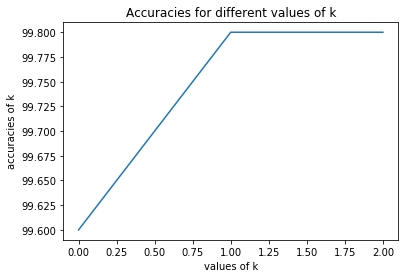

In [192]:
#comparison of accuracies between all 3 knn's
plt.plot(acc_list)
plt.title('Accuracies for different values of k')
plt.ylabel('accuracies of k')
plt.xlabel('values of k')
plt.show()